<a href="https://colab.research.google.com/github/shibania/ML1/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/survey lung cancer (1).csv')
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
dataset.shape

(309, 16)

In [ ]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
dataset.tail(13)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
296,M,63,1,2,1,1,1,2,1,2,2,2,2,1,1,YES
297,F,47,2,2,1,2,2,2,2,2,1,2,2,1,1,YES
298,M,62,2,1,2,1,1,2,1,2,2,2,2,1,2,YES
299,M,65,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
300,F,63,2,2,2,2,2,2,2,2,1,2,2,2,2,YES
301,M,64,1,2,2,2,1,1,2,1,2,1,1,2,2,YES
302,F,65,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
303,M,51,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES


In [ ]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
dataset.duplicated().sum()

33

In [ ]:
df = dataset.drop_duplicates()

In [ ]:
df.shape

(276, 16)

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [ ]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806
SMOKING,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984
YELLOW_FINGERS,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169
ANXIETY,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182
PEER_PRESSURE,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655
CHRONIC DISEASE,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895
FATIGUE,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757
ALLERGY,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440
WHEEZING,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846
ALCOHOL CONSUMING,0.052049,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767


<ipython-input-16-18bb4f32a340>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p= sns.heatmap(df.corr(),annot=True)


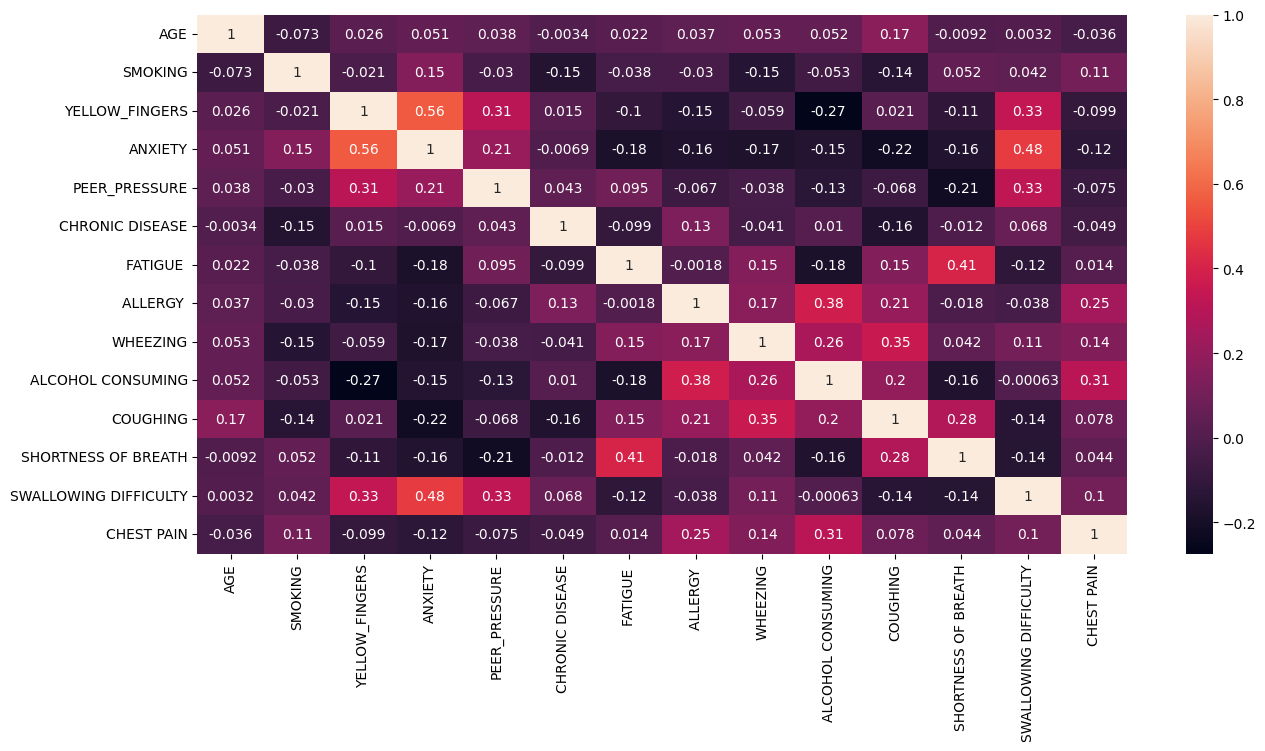

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,7))
p= sns.heatmap(df.corr(),annot=True)

In [ ]:
x = df.iloc[:,:-1]
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2


In [ ]:
y = df.iloc[:,-1].values
y

array(['YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YE

In [ ]:
df['LUNG_CANCER'].value_counts()

YES    238
NO      38
Name: LUNG_CANCER, dtype: int64

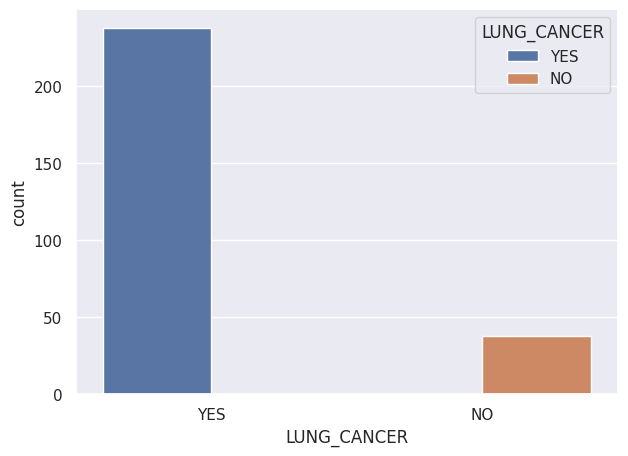

In [ ]:
#Pictorial Representation of two classes present in the dataset
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x ='LUNG_CANCER', hue = "LUNG_CANCER", data = df)
plt.show()

DATA PREPROCESSING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
print(y)

[1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1]


In [ ]:
x = pd.get_dummies(x)
x

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1,0
280,59,2,1,1,1,2,2,2,1,1,1,2,1,1,1,0
281,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0,1
282,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0,1


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    276 non-null    int64
 1   SMOKING                276 non-null    int64
 2   YELLOW_FINGERS         276 non-null    int64
 3   ANXIETY                276 non-null    int64
 4   PEER_PRESSURE          276 non-null    int64
 5   CHRONIC DISEASE        276 non-null    int64
 6   FATIGUE                276 non-null    int64
 7   ALLERGY                276 non-null    int64
 8   WHEEZING               276 non-null    int64
 9   ALCOHOL CONSUMING      276 non-null    int64
 10  COUGHING               276 non-null    int64
 11  SHORTNESS OF BREATH    276 non-null    int64
 12  SWALLOWING DIFFICULTY  276 non-null    int64
 13  CHEST PAIN             276 non-null    int64
 14  GENDER_F               276 non-null    uint8
 15  GENDER_M               276 non-null    u

HANDLING IMBALANCE DATA USING SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

STANDARDIZING DATA 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.85962248, -0.92702481,  1.22689167, ...,  1.32342173,
        -0.82942345,  1.20042727],
       [ 1.45853978,  1.07871978, -0.81506789, ...,  1.32342173,
        -0.82942345,  1.20042727],
       [-0.33821212, -0.92702481, -0.81506789, ...,  1.32342173,
         1.20565677, -0.83303672],
       ...,
       [ 0.02113826, -0.92702481, -0.81506789, ..., -0.75561703,
        -0.82942345, -0.83303672],
       [-0.57777904, -0.92702481, -0.81506789, ..., -0.75561703,
         1.20565677, -0.83303672],
       [-0.69756251,  1.07871978, -0.81506789, ..., -0.75561703,
         1.20565677, -0.83303672]])

SPLITTING OF DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

LOGISTIC REGRESSION

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=100,random_state=0)
cf=classifier.fit(x_train,y_train)

print("The intercept is:",cf.intercept_)
print("The co-efficients are:",cf.coef_)

y_pred=classifier.predict(x_test)



The intercept is: [0.26118727]
The co-efficients are: [[ 0.18546106  0.88315448  0.62321471  0.51736723  0.68695545  1.31366065
   1.07279033  0.81213981  0.55904467  0.5330731   1.22852609 -0.06241369
   1.13432074  0.28036832  0.58458733  0.2744892 ]]


In [ ]:
#EVALUATION METRICS FOR LOGISTIC REGRESSION
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[53  1]
 [ 0 42]]
accuracy: 0.9895833333333334
recall score: 1.0
precision score: 0.9767441860465116
f1 score: 0.988235294117647


DECISION TREE

In [ ]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=10,criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [ ]:
y_pred=dtc.predict(x_test)

In [ ]:
#EVALUATION MATRIX FOR DECISION TREE
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[52  2]
 [ 1 41]]
accuracy: 0.96875
recall score: 0.9761904761904762
precision score: 0.9534883720930233
f1 score: 0.9647058823529412


RANDOM FOREST

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,max_depth=10,criterion='gini',random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=0)

In [ ]:
y_pred=rfc.predict(x_test)

In [ ]:
#EVALUATION MATRIX FOR RANDOM FOREST
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[52  2]
 [ 1 41]]
accuracy: 0.96875
recall score: 0.9761904761904762
precision score: 0.9534883720930233
f1 score: 0.9647058823529412


SUPPORT VECTOR MACHINE

In [ ]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
svcl=SVC(gamma='auto',decision_function_shape="ovo",kernel='rbf',random_state=0)
svcl.fit(x_train,y_train)

SVC(decision_function_shape='ovo', gamma='auto', random_state=0)

In [ ]:
y_pred=svcl.predict(x_test)

In [ ]:
#EVALUATION MATRIX FOR SVM
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[51  3]
 [ 1 41]]
accuracy: 0.9583333333333334
recall score: 0.9761904761904762
precision score: 0.9318181818181818
f1 score: 0.9534883720930233


BAGGING CLASSIFIER

In [ ]:
# BAGGING CLASSIFIER
from sklearn.ensemble import BaggingClassifier
classifier=BaggingClassifier(n_estimators=10,bootstrap=True,n_jobs=10,max_features=1,random_state=0)
classifier.fit(x_train,y_train)

BaggingClassifier(max_features=1, n_jobs=10, random_state=0)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
#EVALUATION MATRIX FOR BAGGING
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[52  2]
 [ 3 39]]
accuracy: 0.9479166666666666
recall score: 0.9285714285714286
precision score: 0.9512195121951219
f1 score: 0.9397590361445782


ADABOOST CLASSIFIER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(n_estimators=25,learning_rate=10,random_state=0)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=10, n_estimators=25, random_state=0)

In [ ]:
y_pred=adaboost.predict(x_test)

In [ ]:
#EVALUATION MATRIX FOR ADABOOST CLASSIFIER
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[ 1 53]
 [ 0 42]]
accuracy: 0.4479166666666667
recall score: 1.0
precision score: 0.4421052631578947
f1 score: 0.6131386861313868


KNEAREST NEIGHBORS

In [ ]:
#KNEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knc.predict(x_test)

In [ ]:
#EVALUATION MATRIX FOR KNEAREST NEIGHBORS
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[54  0]
 [ 1 41]]
accuracy: 0.9895833333333334
recall score: 0.9761904761904762
precision score: 1.0
f1 score: 0.9879518072289156


ANOMALY DETECTION USING ISOLATION FOREST

In [ ]:
#ISOLATION FOREST
from sklearn.ensemble import IsolationForest
import numpy as np
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), max_features=1.0)
model.fit(x_train,y_train)

IsolationForest(contamination=0.12)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(np.where(y_pred == -1)[0])

[ 0  1  4 11 13 14 30 33 37 38 44 46 47 57 64 69 73]


ACCURACY OF VARIOUS ML ALGORITHM

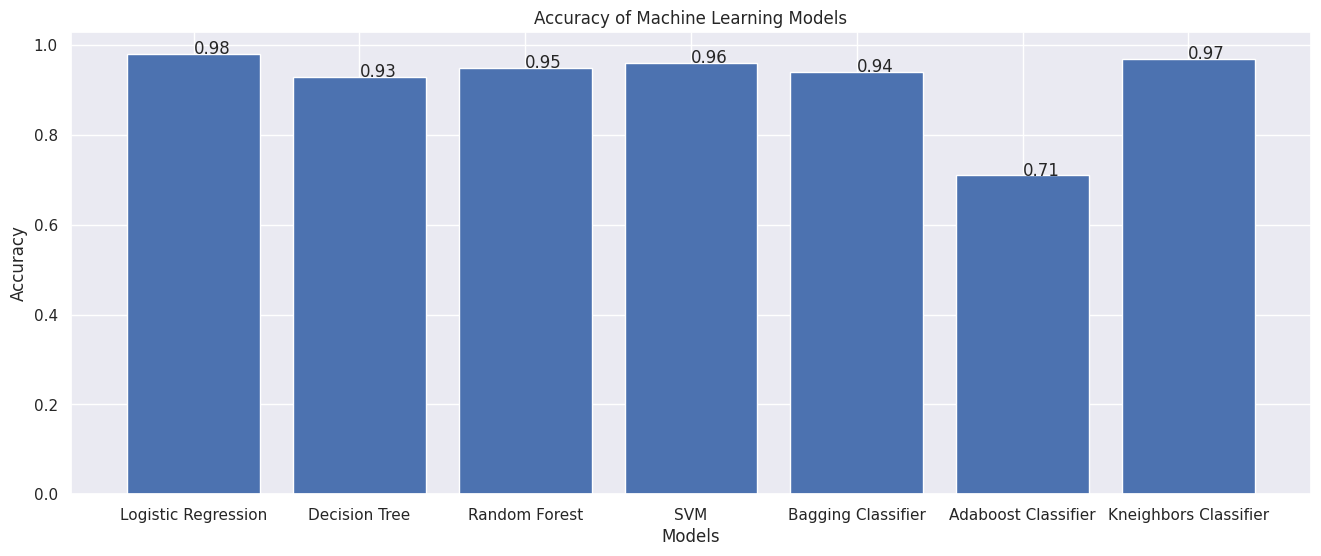

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Bagging Classifier', 'Adaboost Classifier', 'Kneighbors Classifier']
accuracy = [0.98,0.93,0.95,0.96,0.94,0.71,0.97]

fig, ax = plt.subplots()
ax.bar(models, accuracy)

# Set the figure size
fig.set_size_inches(16, 6)  # Adjust the width and height as desired

for index, value in enumerate(accuracy):
    plt.text(index, value,
             str(value))

# Add labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Machine Learning Models')

# Display the plot
plt.show()

LOGISTIC REGRESSION SHOW HIGH ACCURACY AMONG VARIOUS MACHING LEARNING ALGORITHM 

*   LOGISTIC REGRESSION =0.98
*   DECISION TREE       =0.93
*   RANDOM FOREST       =0.95
*   SVM                 =0.96
*   BAGGING CLASSIFIER  =0.94
*   ADABOOST CLASSIFIER =0.71
*   KNEIGHBORS          =0.97

FEATURE SELECTION USING ANOVA

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
select = SelectKBest(f_classif,k=5)
z = select.fit_transform(x,y)
 
print("After selecting best 5 features:", z.shape) 

New_features=select.get_feature_names_out()
list(New_features)

After selecting best 5 features: (476, 5)


['x7', 'x8', 'x9', 'x10', 'x12']

HYPER PARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the AdaBoost classifier
adaboost = AdaBoostClassifier()

# define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.1, 0.5, 1.0, 2.0]
}

# define the GridSearchCV object
grid_search = GridSearchCV(adaboost, param_grid, cv=5)

# fit the GridSearchCV object to the data
grid_search.fit(x_train,y_train)

# print the best hyperparameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 100}
Best score:  0.9394736842105263


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(n_estimators=100,learning_rate=0.1)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [ ]:
y_pred=adaboost.predict(x_test)

In [ ]:
#EVALUATION MATRIX FOR ADABOOST CLASSIFIER
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall score:",recall_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))

[[52  2]
 [ 1 41]]
accuracy: 0.96875
recall score: 0.9761904761904762
precision score: 0.9534883720930233
f1 score: 0.9647058823529412


By Using GridSearchCv, accuracy for adaboostclassifier increased from 44.7 to 96.8